<a href="https://colab.research.google.com/github/ycw0363/stat_seminar/blob/main/Mid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie recommendation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Library load

In [ ]:
from google.colab import files
myfile = files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv
Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [ ]:
import io
movies = pd.read_csv(io.BytesIO(myfile['tmdb_5000_movies.csv']))
credits = pd.read_csv(io.BytesIO(myfile['tmdb_5000_credits.csv']))

In [ ]:
credits.columns = ['id', 'title', 'cast', 'crew']

In [ ]:
movies.columns 

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
movies = movies.merge(credits, on = 'id')

join the two dataset on the `id` column

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

`hompage` and `tagline` have null values, but we don't use them. so we don't have to change null values.

In [ ]:
mv_df = movies[['id', 'title_x', 'genres', 'overview', 'vote_average', 'vote_count', 'popularity' ]]
mv_df.head()

,id,title_x,genres,overview,vote_average,vote_count,popularity
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",7.2,11800,150.437577
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]","Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",6.9,4500,139.082615
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,6.3,4466,107.376788
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...","Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",7.6,9106,112.312950
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fic...","John Carter is a war-weary, former military captain who's inexplicably transported to the myster...",6.1,2124,43.926995


Text(0.5, 0, 'Popularity')

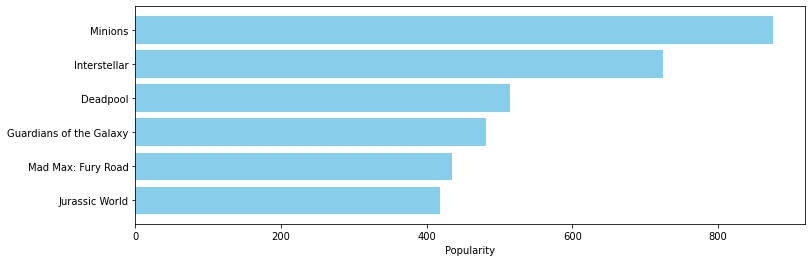

In [ ]:
pop= movies.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title_x'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")

Text(0.5, 0, 'Count of votes')

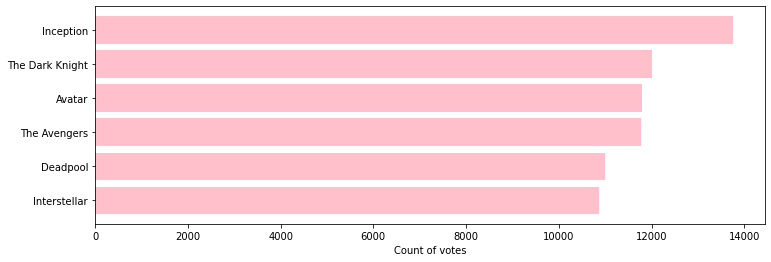

In [ ]:
vot= movies.sort_values('vote_count', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(vot['title_x'].head(6),vot['vote_count'].head(6), align='center',
        color='pink')
plt.gca().invert_yaxis()
plt.xlabel("Count of votes")

We can find movies that are popular only by sorting the dataset by the `popularity` column

and you can compare with `popularity` and `vote_count` by bar plot

## Genre content filtering

In `genres` column has form of dictionary. we should change the set of option  

In [ ]:
pd.set_option('max_colwidth', 100)
mv_df[['genres']][:1]

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {..."


In [ ]:
mv_df['genres']=mv_df['genres'].apply(literal_eval)
mv_df.head()

,id,title_x,genres,overview,vote_average,vote_count
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...","In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]","Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",6.9,4500
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}]",A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...,6.3,4466
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': ...","Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c...",7.6,9106
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fic...","John Carter is a war-weary, former military captain who's inexplicably transported to the myster...",6.1,2124


In [ ]:
mv_df['genres'] = mv_df['genres'].apply(lambda x : [ y['name'] for y in x])
mv_df[['genres']][:1]

,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"


Now we can see `genres` names extracted by keys

In [ ]:
mv_df[['genres']]

,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"
...,...
4798,"[Action, Crime, Thriller]"
4799,"[Comedy, Romance]"
4800,"[Comedy, Drama, Romance, TV Movie]"
4801,[]


In this recommendation system, we find similarity in genres. Then we recommend the movies that are mostly similar.

In [ ]:
mv_df['genres_letter'] = mv_df['genres'].apply(lambda x: (' ').join(x))

In [ ]:
count_vec=CountVectorizer(min_df=0, ngram_range=(1, 2))
gr_mat=count_vec.fit_transform(mv_df['genres_letter'])
print(genre_mat.shape)

(4803, 276)


To use CounterVectorizer change `genres` to `genres_letter` that separate words by blanks. By using CounterVectorizer, we make matrix of genres_letter.


In [ ]:
gr_sim=cosine_similarity(genre_mat, genre_mat)
print(gr_sim.shape)
print(gr_sim[:1])
gr_sim_sorted =gr_sim.argsort()[:, ::-1]
print(gr_sim_sorted[:1])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]]
[[   0 3494  813 ... 3038 3037 2401]]


Use Cosine similarity and sorted by descending order.

Result of `gr_sim_sorted[:1]`(first record) shows except 0(itself), record 3494 has highest similarity and second is record 813.

In [ ]:
mv_df[['title_x', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

,title_x,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


In this result, *Stiff Upper Lips*, *Me You and Five Bucks* are ranked first and second. But their `vote_count` are only 1 and 2. Vote counts of *The Shawshank Redemption* and *The Godfather* shows they are popular. So we should use Weighted Rating method that used in IMDB(famous movie rating site).



**Weighted Rating**
 
 **= (v/(v+m)) * R + (m/(v+m)) * C**

 v: the number of votes for the movies
 
 m: minimum votes required to be listed in the chart
 
 -> we'll set the minimum as 90th percentile as our cutoff.
 
 R: average rating of the movie

 C: mean vote across the whole report

In [ ]:
m = mv_df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [ ]:
C = mv_df['vote_average'].mean()

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
   
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
mv_df['score'] = movies.apply(weighted_rating, axis=1)

In [ ]:
mv_df[['title_x', 'vote_count', 'vote_average','score']].sort_values('score', ascending=False)[:10]

,title_x,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


On the standard of `score` column, we sorted more accurately. 

Now, by using cosine similarity, we'll make recommendation system by genre.